### COVID-19 Canada study: has the province begun to flatten the curve?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the `cases.csv` file from https://github.com/ishaberry/Covid19Canada

In [2]:
df_cases = pd.read_csv('cases.csv')

Look at the columns of the CSV file:

In [3]:
df_cases.columns

Index(['case_id', 'provincial_case_id', 'age', 'sex', 'health_region',
       'province', 'country', 'date_report', 'report_week', 'travel_yn',
       'travel_history_country', 'locally_acquired', 'case_source',
       'additional_info', 'additional_source', 'method_note'],
      dtype='object')

Counting by province:

In [4]:
df_cases['province'].value_counts()

Quebec           10912
Ontario           6401
Alberta           1451
BC                1370
Nova Scotia        373
Saskatchewan       278
NL                 236
Manitoba           224
New Brunswick      111
PEI                 25
Repatriated         13
Yukon                8
NWT                  5
Name: province, dtype: int64

Setting the `date_report` variable to a `datetime` variable:

In [5]:
df_cases['date_report'] = pd.to_datetime(df_cases['date_report'], dayfirst=True)

Now group by province and then the date of report to get the new case count for each day in each province:

In [7]:
df_cases.groupby(['province', 'date_report']).count()['case_id']

province  date_report
Alberta   2020-03-05      1
          2020-03-06      1
          2020-03-08      2
          2020-03-09     10
          2020-03-11      5
                         ..
Yukon     2020-03-27      1
          2020-03-30      1
          2020-04-01      1
          2020-04-06      1
          2020-04-08      1
Name: case_id, Length: 307, dtype: int64

In [8]:
df_dailynew = df_cases.groupby(['province', 'date_report']).count()['case_id']

### Plotting daily new cases vs daily cumulative cases

#### British Columbia

In [32]:
df_new_bc = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'BC']
df_cul_bc = df_new_bc.cumsum()

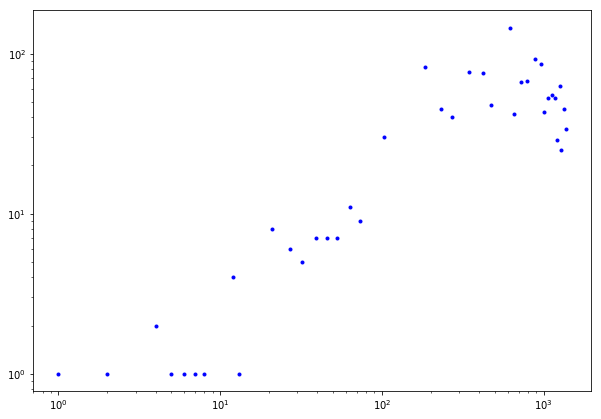

In [33]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_bc, df_new_bc, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

It tapers off! Hopefully things will look up soon.

#### Alberta

In [34]:
df_new_ab = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Alberta']
df_cul_ab = df_new_ab.cumsum()

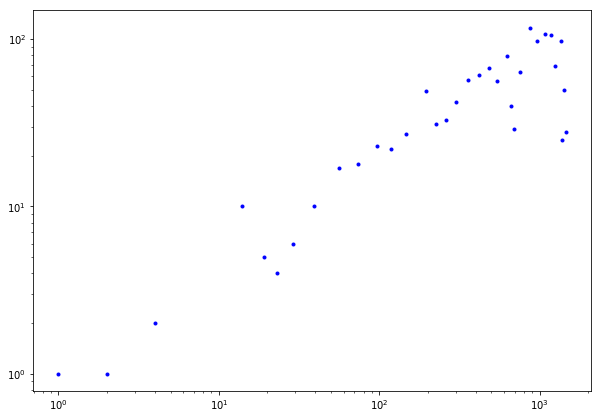

In [35]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_ab, df_new_ab, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Alberta also seems to have tapered off in recent days.

#### Saskatchewan

In [36]:
df_new_sk = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Saskatchewan']
df_cul_sk = df_new_sk.cumsum()

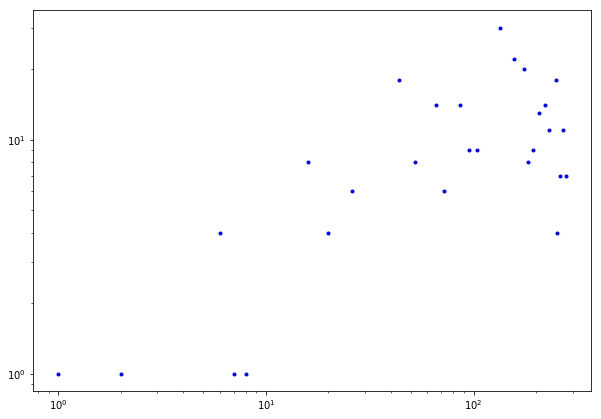

In [37]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_sk, df_new_sk, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Saskatchewan seems to be dropping off as well

#### Manitoba

In [38]:
df_new_mb = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Manitoba']
df_cul_mb = df_new_mb.cumsum()

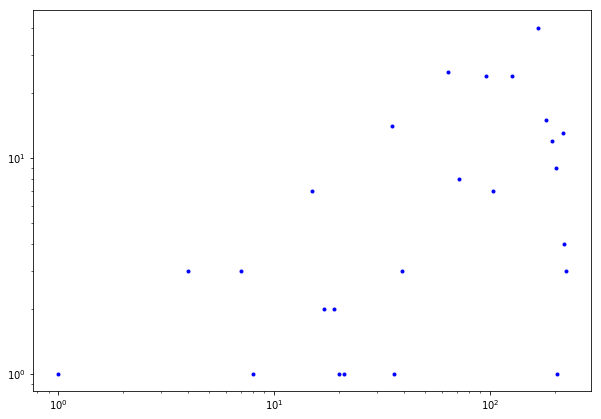

In [39]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_mb, df_new_mb, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Maybe the cases are too low to see whether the trend has really petered off. Let's hope for the best.

#### Ontario

In [40]:
df_new_on = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Ontario']
df_cul_on = df_new_on.cumsum()

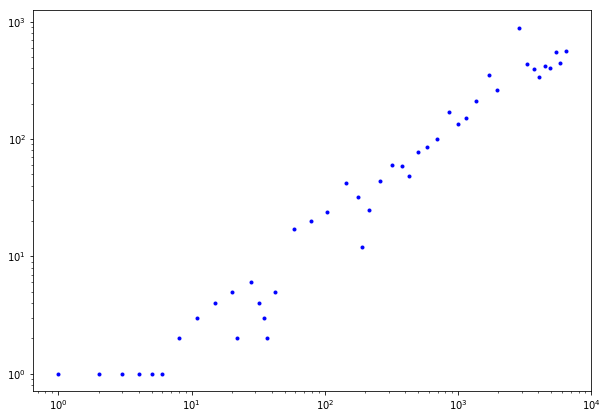

In [41]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_on, df_new_on, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Unfortunately, the curve for Ontario shows no signs of being flattened

#### Quebec

In [42]:
df_new_qc = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Quebec']
df_cul_qc = df_new_qc.cumsum()

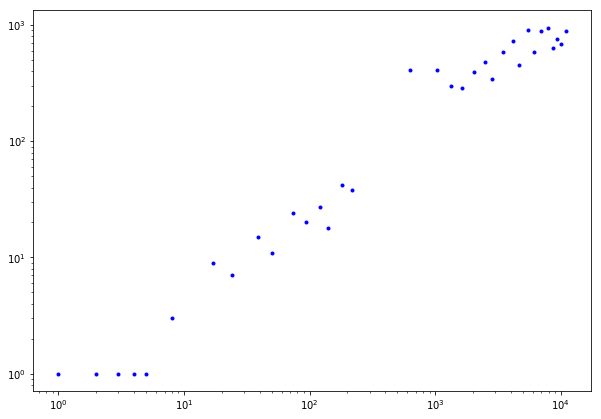

In [43]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_qc, df_new_qc, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

The curve for Quebec does not seem to begin to flatten yet

#### New Brunswick

In [44]:
df_new_nb = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'New Brunswick']
df_cul_nb = df_new_nb.cumsum()

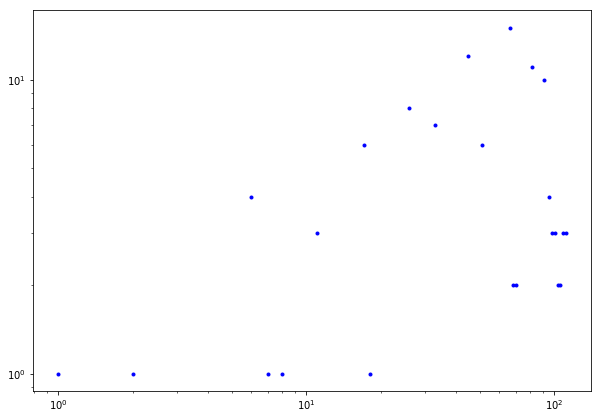

In [45]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_nb, df_new_nb, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

The curve might have started to flatten, but due to its low number of cases, the data points are too scattered for us to say with certainty.

#### Nova Scotia

In [46]:
df_new_ns = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'Nova Scotia']
df_cul_ns = df_new_ns.cumsum()

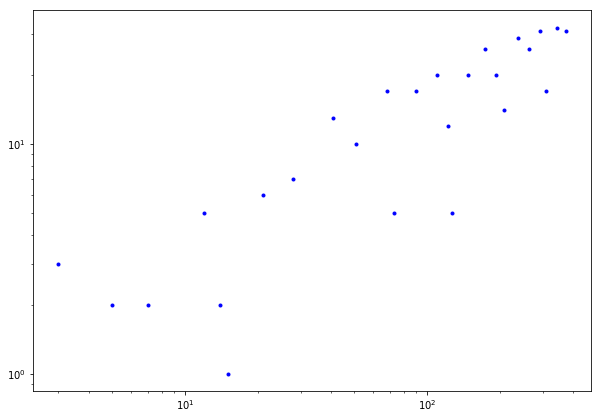

In [47]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_ns, df_new_ns, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

The curve for Nova Scotia does not show any signs of flattening just yet...

#### PEI

In [48]:
df_new_pe = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'PEI']
df_cul_pe = df_new_pe.cumsum()

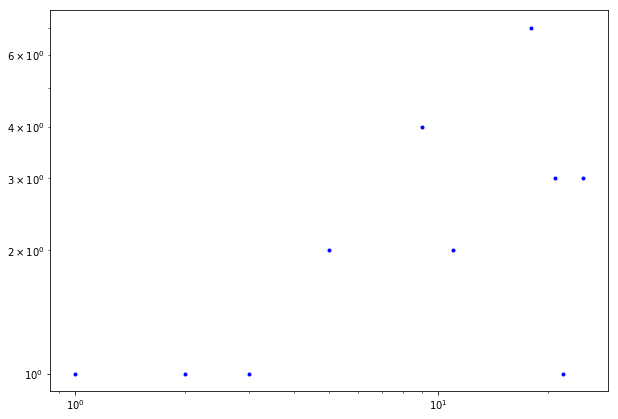

In [49]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_pe, df_new_pe, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Again, cases may be too few to say with certainty whether they have passed the peak

#### Newfoundland and Labrador

In [50]:
df_new_nl = df_dailynew.iloc[df_dailynew.index.get_level_values('province') == 'NL']
df_cul_nl = df_new_nl.cumsum()

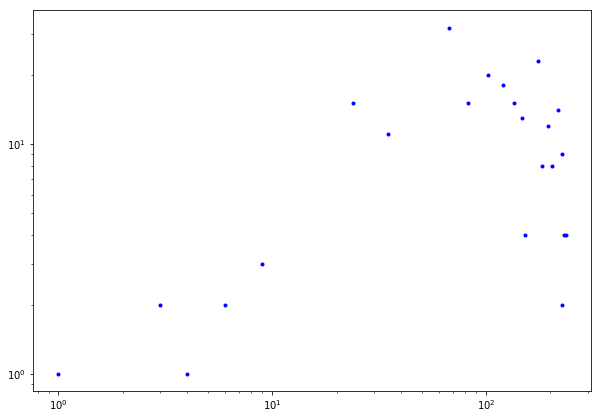

In [51]:
plt.figure(figsize=(10,7))
plt.plot(df_cul_nl, df_new_nl, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.show()

The signs are encouraging for Newfoundland and Labrador